In [20]:
import pandas as pd
import numpy as np

In [4]:
df=pd.read_csv("banknote.csv",names=range(0,5),header=0)

In [5]:
df.head()

,0,1,2,3,4
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [11]:
df['out']=df[4]

In [12]:
df.head()

,0,1,2,3,4,out
0,4.54590,8.1674,-2.4586,-1.46210,0,0
1,3.86600,-2.6383,1.9242,0.10645,0,0
2,3.45660,9.5228,-4.0112,-3.59440,0,0
3,0.32924,-4.4552,4.5718,-0.98880,0,0
4,4.36840,9.6718,-3.9606,-3.16250,0,0


In [13]:
df.drop(4,axis=1,inplace=True)

In [14]:
df.head()

,0,1,2,3,out
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.linear_model import LogisticRegression

In [27]:
data=pd.read_csv("banknote.csv",names=["variance","skewness","curtosis","entropy","class"],header=0)

In [28]:
data.head()

,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


In [29]:
df=data.copy()

In [30]:
df.head()

,variance,skewness,curtosis,entropy,class
0,4.54590,8.1674,-2.4586,-1.46210,0
1,3.86600,-2.6383,1.9242,0.10645,0
2,3.45660,9.5228,-4.0112,-3.59440,0
3,0.32924,-4.4552,4.5718,-0.98880,0
4,4.36840,9.6718,-3.9606,-3.16250,0


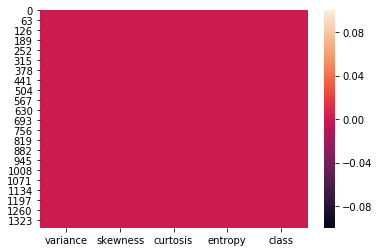

In [31]:
sns.heatmap(df.isnull())

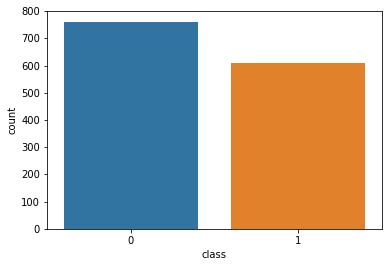

In [32]:
sns.countplot("class",data=df)

In [37]:
df["class"].unique()

array([0, 1], dtype=int64)

In [40]:
df["class"].value_counts()


0    761
1    610
Name: class, dtype: int64

{'whiskers': [<matplotlib.lines.Line2D at 0x21a3465beb8>,
 'caps': [<matplotlib.lines.Line2D at 0x21a34199828>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3465bda0>],
 'medians': [<matplotlib.lines.Line2D at 0x21a34199eb8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a34199f98>],
 'means': []}

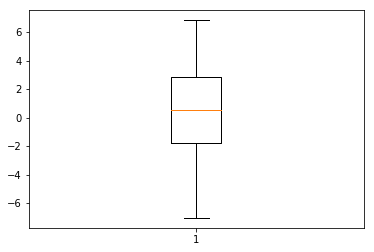

In [41]:
plt.boxplot(df["variance"])

{'whiskers': [<matplotlib.lines.Line2D at 0x21a3469e978>,
 'caps': [<matplotlib.lines.Line2D at 0x21a3469eda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x21a3469e550>],
 'medians': [<matplotlib.lines.Line2D at 0x21a346aa6d8>],
 'fliers': [<matplotlib.lines.Line2D at 0x21a346aa9e8>],
 'means': []}

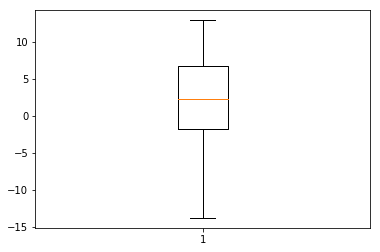

In [42]:
plt.boxplot(df["skewness"])

In [48]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [49]:
x.shape

(1371, 4)

In [50]:
y.shape

(1371,)

In [51]:
df.shape

(1371, 5)

In [52]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=47)

In [55]:
lr=LogisticRegression()
import warnings
warnings.filterwarnings("ignore")

In [56]:
lr.fit(x_train,y_train)
lr.score(x_train,y_train)

0.9934640522875817

In [57]:
pred=lr.predict(x_test)

In [58]:
accuracy_score(y_test,pred)

0.9823399558498896

In [60]:
confusion_matrix(y_test,pred)

array([[247,   5],
       [  3, 198]], dtype=int64)

In [61]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98       252
           1       0.98      0.99      0.98       201

   micro avg       0.98      0.98      0.98       453
   macro avg       0.98      0.98      0.98       453
weighted avg       0.98      0.98      0.98       453



In [62]:
import pickle

In [63]:
logic=pickle.dumps(lr)
model=pickle.loads(logic)

In [64]:
model.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,

In [65]:
from sklearn.externals import joblib

In [67]:
joblib.dump(lr,"logix")

['logix']

In [68]:
modelx=joblib.load("logix")

In [70]:
modelx.predict(x_test)

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,